In [2]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn


n_samples = 10000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
5,-0.133929,0.776249,1
6,0.779197,0.645811,0
7,0.722955,0.173831,1
8,-0.121807,0.796951,1
9,0.849529,0.505678,0


In [4]:
circles.label.value_counts()

1    5000
0    5000
Name: label, dtype: int64

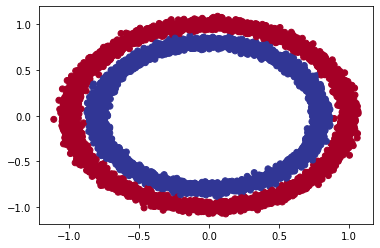

In [5]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [6]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.0465,  0.8248],
         [ 1.0051, -0.4334],
         [-0.5835,  0.7945],
         [ 0.9848, -0.3252],
         [ 0.8299, -0.5472]]),
 tensor([1., 0., 0., 0., 0.]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [8]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer15 = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=5, out_features=5)
        self.layer25 = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_3(self.layer25(self.layer_2(self.layer15(self.layer_1(x))))) 
model = CircleModel()
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer15): ReLU()
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer25): ReLU()
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

In [9]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
### L2 Regularization

In [10]:
torch.manual_seed(42)
epochs = 10000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) 
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}| Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.69268| Test Loss: 0.69244
Epoch: 100 | Loss: 0.69219| Test Loss: 0.69209
Epoch: 200 | Loss: 0.69165| Test Loss: 0.69158
Epoch: 300 | Loss: 0.69114| Test Loss: 0.69108
Epoch: 400 | Loss: 0.69049| Test Loss: 0.69042
Epoch: 500 | Loss: 0.68992| Test Loss: 0.68986
Epoch: 600 | Loss: 0.68934| Test Loss: 0.68928
Epoch: 700 | Loss: 0.68873| Test Loss: 0.68865
Epoch: 800 | Loss: 0.68807| Test Loss: 0.68797
Epoch: 900 | Loss: 0.68736| Test Loss: 0.68723
Epoch: 1000 | Loss: 0.68659| Test Loss: 0.68642
Epoch: 1100 | Loss: 0.68576| Test Loss: 0.68555
Epoch: 1200 | Loss: 0.68487| Test Loss: 0.68460
Epoch: 1300 | Loss: 0.68392| Test Loss: 0.68361
Epoch: 1400 | Loss: 0.68292| Test Loss: 0.68255
Epoch: 1500 | Loss: 0.68186| Test Loss: 0.68142
Epoch: 1600 | Loss: 0.68073| Test Loss: 0.68023
Epoch: 1700 | Loss: 0.67952| Test Loss: 0.67895
Epoch: 1800 | Loss: 0.67830| Test Loss: 0.67764
Epoch: 1900 | Loss: 0.67703| Test Loss: 0.67630
Epoch: 2000 | Loss: 0.67571| Test Loss: 0.67492
Epoc

In [11]:
model.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.]),
 tensor([1., 0., 0., 0., 0., 1., 0., 1., 1., 0.]))

In [12]:
### Copied
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


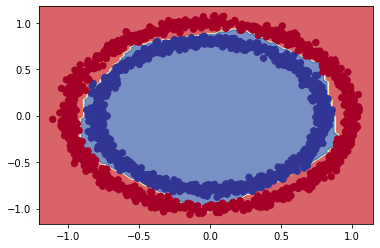

In [13]:
plot_decision_boundary(model, X_test, y_test) 